
### Постановка задачі 

Дано набір даних про фрукти. **Розв'язати задачу класифікації.**


In [151]:

%matplotlib inline

import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from util import plot_fruit_knn
import seaborn as sns
import pylab as pl
from matplotlib import cm
from sklearn.neighbors import KNeighborsClassifier



Приклад вхідних даних (перші рядки):


In [152]:

fruits = pd.read_csv('../resource/fruit_data.csv')
fruits.head()


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [153]:

# create a mapping from fruit label value to fruit name to make results easier to interpret
look_up_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
look_up_fruit_name


{1: 'apple     ', 2: 'mandarin  ', 3: 'orange    ', 4: 'lemon     '}


Кожен рядок набору даних описує певний фрукт і його характеристики.

Датасет містить інформацію про 59 фруктів, 7 характеристик на кожний:


In [154]:

fruits.shape


(59, 7)


Дані досить збалансовані, за винятком мандарин


In [155]:

fruits.groupby('fruit_name').size()


fruit_name
apple         19
lemon         16
mandarin       5
orange        19
dtype: int64

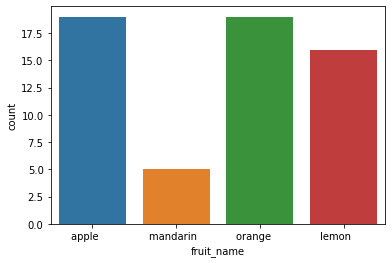

In [156]:

sns.countplot(fruits['fruit_name'],label="Count")
plt.show()



### Візуалізація даних

* Діаграма розмаху для кожної числової характеристики дасть нам чіткіше уявлення про розподіл вхідних даних:


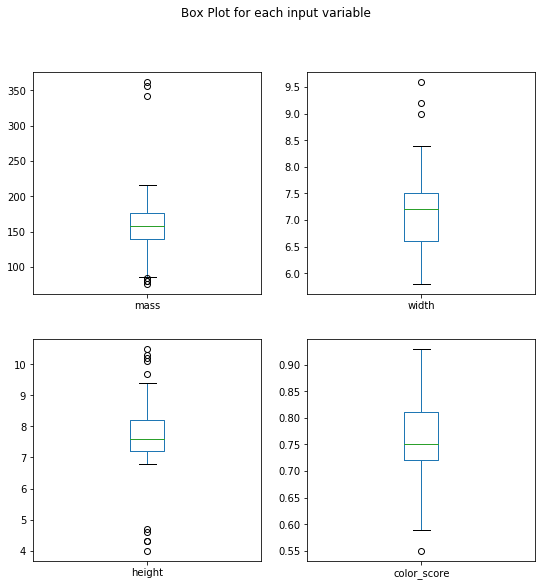

In [157]:

fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('fruits_box')
plt.show()



* Діаграма розподілу (характеристика коліру майже відповідає нормальному розподілу):


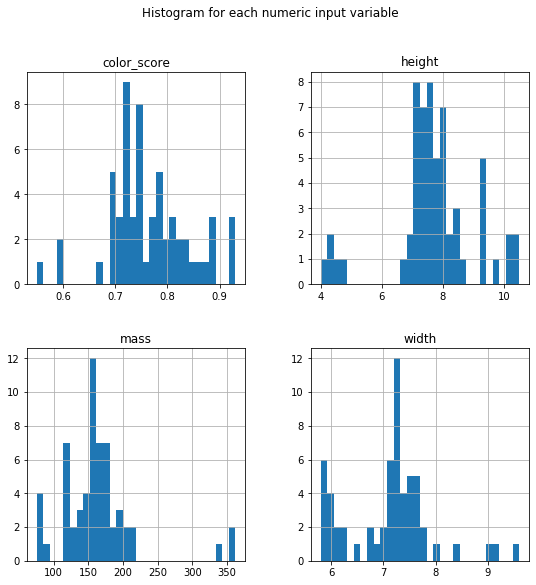

In [158]:

fruits.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()



* Деякі пари атрибутів взаємопов'язані (маса та ширина). Це говорить про високу кореляцію між ними:


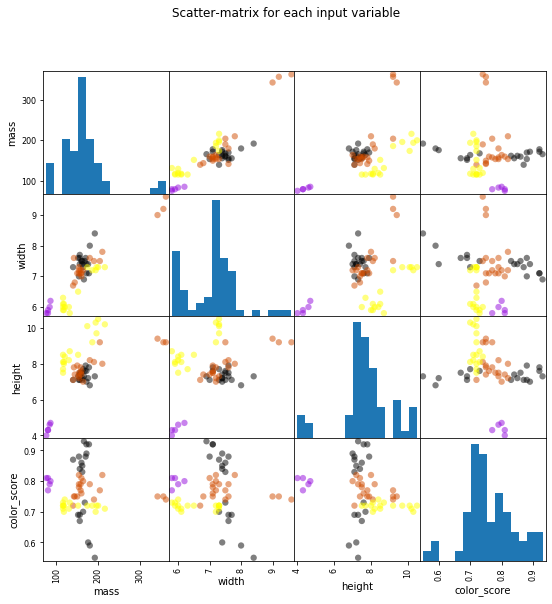

In [159]:

feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
Y = fruits['fruit_label']

# plotting a scatter matrix
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = Y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')


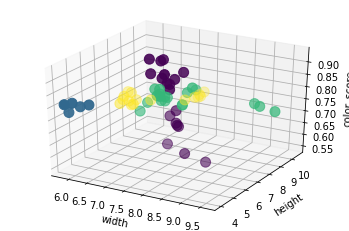

In [160]:

# plotting a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X['width'], X['height'], X['color_score'], c = Y, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()



### Створення навчального та тестового наборів


In [174]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)


In [176]:

# Create classifier object

knn = KNeighborsClassifier(n_neighbors = 5)
# Train the classifier using the training data
knn.fit(X_train, y_train)
print('Точність класифікатора "K-найближчих сусідів" на навчальному наборі: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Точність класифікатора "K-найближчих сусідів" на тестовому наборі: {:.2f}'
     .format(knn.score(X_test, y_test)))


Точність класифікатора "K-найближчих сусідів" на навчальному наборі: 0.80
Точність класифікатора "K-найближчих сусідів" на тестовому наборі: 0.53


In [164]:

# Use the trained k-NN classifier model to classify new, previously unseen objects
fruit_prediction = knn.predict([[60, 4.3, 5.5, 0.8]])
look_up_fruit_name[fruit_prediction[0]]


'mandarin  '

In [165]:

fruit_prediction = knn.predict([[100, 6.3, 8.5, 0.86]])
look_up_fruit_name[fruit_prediction[0]]


'lemon     '

/home/valzavator/projects/PythonProjects/FruitsClassification/notebook/util.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/valzavator/projects/PythonProjects/FruitsClassification/notebook/util.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


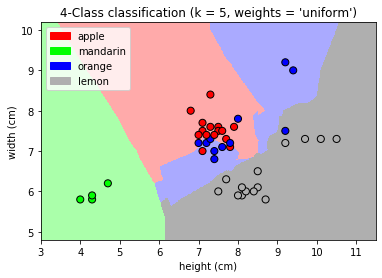

In [166]:

# plot the decision boundaries of the k-NN classifier
plot_fruit_knn(X_train, y_train, 5, 'uniform')


/home/valzavator/projects/PythonProjects/FruitsClassification/notebook/util.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/valzavator/projects/PythonProjects/FruitsClassification/notebook/util.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


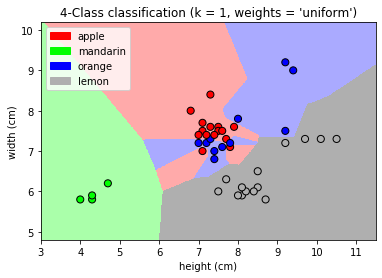

In [178]:

plot_fruit_knn(X_train, y_train, 1, 'uniform')


/home/valzavator/projects/PythonProjects/FruitsClassification/notebook/util.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/valzavator/projects/PythonProjects/FruitsClassification/notebook/util.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


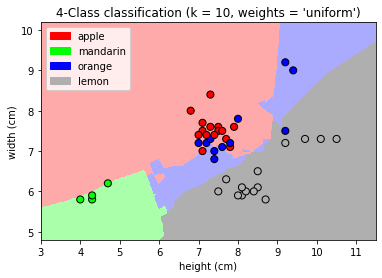

In [168]:

plot_fruit_knn(X_train, y_train, 10, 'uniform')




Залежність точності класифікації метода k-NN від вибору параметра "k":


([<matplotlib.axis.XTick at 0x7f2775dcb940>,
 <a list of 5 Text xticklabel objects>)

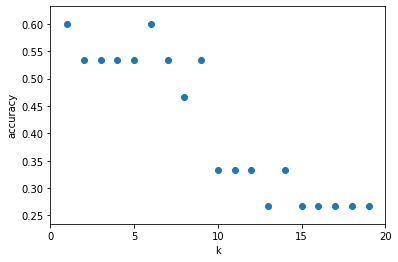

In [173]:

k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0, 5,10,15,20])



Залежність точності класифікації метода k-NN від пропорції розділення train/test:


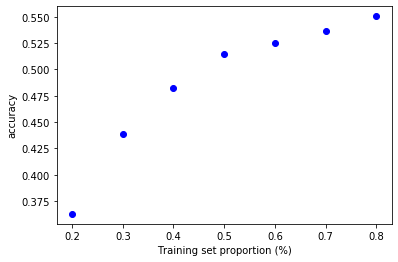

In [170]:

t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
knn = KNeighborsClassifier(n_neighbors = 5)
plt.figure()
for s in t:
    scores = []
    for i in range(1, 1000):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy')
plt.show()
